# Heatsink  estimation models with simple and multiple linear regressions

*Written by Marc Budinger, INSA Toulouse, France*

To improve cooling of components heatsinks with natural of forced convection are used. We want to have simple models to make the links between the dimensions, mass, heat resistance and conditions of use of a heatsink.  We will use catalogs data  to establish these estimation models necessary for our study.  
This tutorial illustrates how to use simple and multiple linear regressions of catalog data to set up estimation models.

*Heatsink*
![Heatsink](https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/images/Heatsink.png)


### Simple linear regression

For a heat sink, the relation linking the thermal resistance $R_{th}$, temperature rise $\Delta T=T_{heatsink}-T_{ambient}$ and power dissipated $P_{th}$ is:  
$\Delta T=T_{heatsink}-T_{ambient} = R_{th}.P_{th}$  

The folowing data are from a heat sinks catalog (standard extruded heat sinks of Aavid Thermalloy). The given thermal resisatnce have to be corrected when temperature rise is not equal to 75 °C, the length different of 150 mm, and the speed for forced convection different of 2 m/s. Correction factors are thus discussed in the following sections.

#### Temperature correction factor 
Both natural convection and radiation coefficients are related to the sink-to-ambient temperature
difference. To evaluate the thermal performance of a heat sink for an application requiring a sink-to-
ambient temperature rise other than 75 º C, use the correction factor from the thermal resistance vs (Ts - Ta) graph shown. This factor must be used only for thermal resistance in natural convection.

![Temperature Correction Factor](pictures/TemperatureCorrectionFactor.png)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# input data
x = np.transpose(np.array([80,75,70,60,50,40,30])) # temperature rise
y = np.transpose(np.array([0.99, 1, 1.02, 1.075, 1.15, 1.25, 1.39])) # multiplication factor

# plot the data 
plt.plot(x,y, 'o')
plt.xlabel('Temperature rise [°C]')
plt.ylabel('Multiplication factor of thermal resistance [-]')
plt.grid()
plt.show()


We want to express this relation with a polynomial model:

$\frac{R_{th,n}}{R_{th,n,75^{\circ} C}}=\beta _{0}+\beta _{1}.\Delta T+\beta _{2}.\Delta T^{2}$

For this model the relation between data and regression coefficients can be represented with a matrix notation:

\begin{align*}
Y=X.\beta +\varepsilon
\end{align*}

Equivalent to:

\begin{align*}
\left(\begin{array}{l}
y_{1}\\
\ldots \\
y_{p}
\end{array}\right)=\left(\begin{array}{lll}
1 & x_{11} & \ldots \\
\ldots & \ldots & \ldots \\
1 & x_{p1} & \ldots 
\end{array}\right)\left(\begin{array}{l}
\beta _{0}\\
\ldots \\
\beta _{p}
\end{array}\right)+\left(\begin{array}{l}
\varepsilon _{1}\\
\ldots \\
\varepsilon _{p}
\end{array}\right)
\end{align*}

with:  
 * $Y$, the output data vector: here $R_{th,n}/R_{th,n,70°C}$  
 * $X$, the input data matrix: here $\Delta T$  
 * $\beta$, the coefficients of model  

> Exercice 1: In the case of least square error assumption, demonstrate that the $\beta$ vector can be calculated with the following relation: $\beta=(X^tX)^{-1}X^tY$. Implement this calculation with python numpy functions: matrix products, matrix inversion and matrix tranposition (here a tutorial about [Matrix arithmetic](https://www.python-course.eu/matrix_arithmetic.php)). Plot the regression and the original data on the same plot. 

> Answer: The errors can be expressed by $\varepsilon = Y-X\beta$. To determine the least squares estimator, we write the sum of squares of the residuals:  
$S(\beta)=\sum\varepsilon^2=\varepsilon^t\varepsilon = (Y-X\beta)^t(Y-X\beta)=Y^tY-Y^tX\beta-\beta^tX^tY+\beta^tX^tX\beta$  
The minimum of $S(\beta)$ is obtained by setting the derivatives of $S(\beta)$ equal to zero:  

> $\frac{\partial S(\varepsilon)}{\partial \beta}=-2Y^tX+2X^tX\beta$  
which gives $\beta=(X^tX)^{-1}X^tY$


In [ ]:
# Determination of the least squares estimator with matrix arithmetic

# Matrix X and Y
X=np.transpose(np.array((np.ones(np.size(x)), x, x**2 )))
Y=y.reshape((np.size(x),1))

# Vector Beta calculation
Beta=np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X) @ y
print("The parameters are :",Beta)

# Y vector prediction
y_est=X @ Beta

# plot the data 
plt.plot(x,y, 'o',x,y_est, '-r')
plt.xlabel('Temperature rise [°C]')
plt.ylabel('Multiplication factor of thermal resistance [-]')
plt.title('Comparison of original data (circles) and OLS regression (red)')
plt.grid()
plt.show()

> Exercice 2: Compare your result with an [Ordinary Least Square](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html) (OLS) regression function of the [StatsModels](https://www.statsmodels.org/stable/index.html) package.  

> Exercice 3: Adapt the linear regression prosses to a power law model  
$\frac{R_{th,n}}{R_{th,n,75^{\circ} C}}=\beta _{0}.\Delta T^{\beta_{1}}$

In [ ]:
# Determination of the least squares estimator with the OLS function 
# of the SatsModels package

import statsmodels.api as sm

model = sm.OLS(Y, X)
results = model.fit()

print('Parameters: ', results.params)
print('R2: ', results.rsquared)

# Y vector prediction
y_OLS=results.predict(X)

# plot the data 
plt.plot(x,y, 'o',x,y_OLS, '-g')
plt.xlabel('Temperature rise [°C]')
plt.ylabel('Multiplication factor of thermal resistance [-]')
plt.title('Comparison of original data (circles) and OLS regression (red)')
plt.grid()
plt.show()



The parameters are : [[ 0.6633644 ]
 [-0.35364883]]


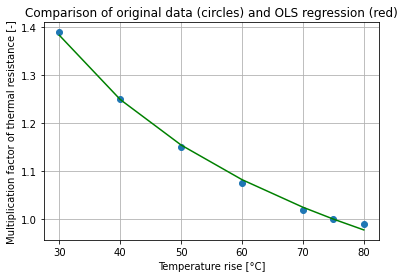

In [5]:
# Power law regression

Y_p=np.log10(Y)
X_p=np.transpose(np.array((np.ones(np.size(x)), np.log10(x) )))

Beta_p=np.linalg.inv(np.transpose(X_p) @ X_p) @ np.transpose(X_p) @ Y_p
print("The parameters are :",Beta_p)

# Y vector prediction
y_est_p=10**(X_p @ Beta_p)

# plot the data 
plt.plot(x,y, 'o',x,y_est_p, '-g')
plt.xlabel('Temperature rise [°C]')
plt.ylabel('Multiplication factor of thermal resistance [-]')
plt.title('Comparison of original data (circles) and OLS regression (red)')
plt.grid()
plt.show()

#### Length correction factor
Because the air heats up while circulating through the extrusion, the convection coefficient is not constant throughout the extrusion length. Therefore, the thermal resistance changes nonlinearly as the length changes. To calculate the correct thermal resistance for extrusion lengths other than the standard 150 mm length, multiply
the given thermal resistance data by the appropriate factor taken from the thermal resistance vs length graph shown. The same correction factor must be used for thermal resistance in both natural convection and forced convection.

![Length correction factor](pictures/LengthCorrectionFactor.png)

> Exercice : Express this relation with a power law model:
$\frac{R_{th}}{R_{th,150mm^{\circ} C}}=k.L^a$  

In [6]:
# input data
x = np.transpose(np.array([50,100,150,200,250,300,350,400])) # temperature rise
y = np.transpose(np.array([2.3, 1.35, 1, 0.8, .7, 0.6, .55, .5])) # multiplication factor
 
# Matrix X and Y
X=np.transpose(np.array((np.ones(np.size(x)), np.log10(x))))
Y=np.log10(y).reshape((np.size(x),1))

modelL = sm.OLS(Y, X)
resultsL = modelL.fit()

print('Parameters: ', resultsL.params)
print('R2: ', resultsL.rsquared)

print('The estimation function is: Rth/Rth,150mm = %.3g.L^%.2f'%(10**resultsL.params[0],resultsL.params[1]))
print('with L in mm')

Parameters:  [ 1.60057829 -0.73345535]
R2:  0.9991401923462344
The estimation function is: Rth/Rth,150mm = 39.9.L^-0.73
with L in mm


#### Air speed correction factor 
The convection coefficient is also closely related to the air speed through the fins. Since evaluation of
air speed through the fins is difficult to evaluate under normal circumstances, we show the thermal resistance of an extrusion in forced convection evaluated using a tunnel the same size as the extrusion. For a tunnel airflow other than 2 m/s, refer to the factor in the thermal resistance vs air speed graph shown. Use this factor to figure
thermal resistance in forced convection.

![Length correction factor](pictures/SpeedCorrectionFactor.png)

> Exercice : Express this relation with a polynomial model:
$\frac{R_{th,f}}{R_{th,f,2m/s^{\circ} C}}=\beta _{0}+\beta _{1}.v+\beta _{2}.v^{2}$  

In [7]:
# input data
x = np.transpose(np.array([80,75,70,60,50,40,30])) # temperature rise
y = np.transpose(np.array([0.99, 1, 1.02, 1.075, 1.15, 1.25, 1.39])) # multiplication factor

model = sm.OLS(Y, X)
results = model.fit()

print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 1.60057829 -0.73345535]
R2:  0.9991401923462344


### Thermal resistance : Identification of the most important dimensions

The objective of the estimation model sought here is to evaluate the thermal resistance in natural convection of a heat sink $R_{th,n}$ according to its dimensions (see Figure below). The statistical data are from a heat sinks catalog (standard extruded heat sinks of [Aavid Thermalloy](https://www.boydcorp.com/thermal/heat-sinks/extruded.html)). 

*Section of a heat sink (Length L)*
![HeatsinkSection](pictures/HeatsinkSection.png)


The first step is to import catalog data stored in a .csv file. We use for that functions from [Panda](https://pandas.pydata.org/index.html) package (with here an [introduction to panda](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)).  
All heatsinks have the same length *L* = 150 mm. *Ml* corresponds to the lineic mass (kg/m) of the extruded heatsink.

In [8]:
# Import Heatsink data

# Panda package Importation
import pandas as pd

# Read the .csv file with bearing data
path='https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/data/'
dHS = pd.read_csv(path+'DataHeatsink_Lcst.csv', sep=';')

# Print the head (first lines of the file)
dHS.head()


,Rthn,Rthf,W,H,Wf,Df,Hs,Ml
0,13.20,5.15,19.0,4.8,0.6,1.9,1.1,0.17
1,11.37,3.82,19.0,6.0,0.8,2.3,1.1,0.15
2,0.98,0.46,134.3,19.2,1.6,10.8,4.0,2.34
3,8.79,3.06,24.0,7.3,1.5,3.8,2.3,0.29
4,7.52,3.83,37.5,3.1,1.0,2.6,1.1,0.18


> Exercice: By using a correlation analysis or a scatter matrix (here [examples](http://benalexkeen.com/correlation-in-python/)), identify the most important dimensions among $W, H, W_f, H_f, H_s$. A log transformation can be usefull because of the large range of data.

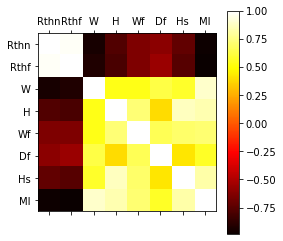

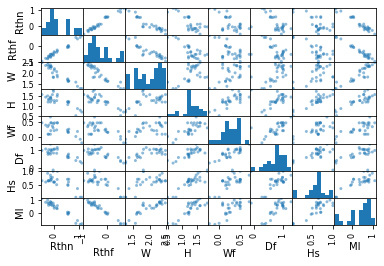

In [13]:
# log transformation of the data
dHSlog=pd.DataFrame(data=np.log10(dHS.values), columns=dHS.columns)

# Correlation matrix
plt.matshow(dHSlog.corr(), cmap='hot')
plt.xticks(range(len(dHS.columns)), dHS.columns)
plt.yticks(range(len(dHS.columns)), dHS.columns)
plt.colorbar()
plt.show()

# Scatter matrix
pd.plotting.scatter_matrix(dHSlog)
plt.show()

In [14]:
dHSlog.corr()

,Rthn,Rthf,W,H,Wf,Df,Hs,Ml
Rthn,1.000000,0.982988,-0.941497,-0.772130,-0.641824,-0.601228,-0.720154,-0.972432
Rthf,0.982988,1.000000,-0.921047,-0.795847,-0.638099,-0.551368,-0.753251,-0.983578
W,-0.941497,-0.921047,1.000000,0.538247,0.539831,0.635455,0.578804,0.896725
H,-0.772130,-0.795847,0.538247,1.000000,0.724113,0.394089,0.868716,0.841858
Wf,-0.641824,-0.638099,0.539831,0.724113,1.000000,0.660137,0.705544,0.720821
Df,-0.601228,-0.551368,0.635455,0.394089,0.660137,1.000000,0.419632,0.570614
Hs,-0.720154,-0.753251,0.578804,0.868716,0.705544,0.419632,1.000000,0.829186
Ml,-0.972432,-0.983578,0.896725,0.841858,0.720821,0.570614,0.829186,1.000000


#### Natural thermal resistance : Multiple linear regression

We want to perform here a multiple linear regression to determine an estimation model of the form.  
$R_{th,n}=aX^{b}Y^{c}$

where:
 * ${a, b, c}$ are the coefficients of the model

 * ${X, Y}$ are the most influential dimensions.

> Exercice: Perform this multiple linear regression with the [StatsModels](https://www.statsmodels.org/stable/index.html) package and dedicated transformations.


In [10]:
# Determination of the least squares estimator with the OLS function 
# of the SatsModels package

# Generation of Y and X matrix
YHS=dHSlog['Rthn'].values
YHS=YHS.reshape((np.size(YHS),1))
XHS=np.transpose(np.array((np.ones(np.size(dHSlog['W'].values)), dHSlog['W'].values, dHSlog['H'].values)))

# OLS regression
modelHS = sm.OLS(YHS, XHS)
resultHS = modelHS.fit()

# Results print
print('Parameters: ', resultHS.params)
print('R2: %.3f'% resultHS.rsquared)

print('The estimation function is: Rth,n = %.3g.W^%.2f.H^%3.2f'
      %(10**resultHS.params[0],resultHS.params[1],resultHS.params[2]))
print('with Rth,n in [°/W], W,H in [mm] and L=150 mm')

Parameters:  [ 2.685738   -0.91835926 -0.55758774]
R2: 0.986
The estimation function is: Rth,n = 485.W^-0.92.H^-0.56
with Rth,n in [°/W], W,H in [mm] and L=150 mm


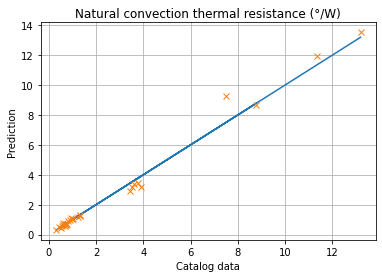

In [11]:
# Y vector prediction
y_HS=10**(resultHS.predict(XHS))

# plot the data 
#plt.plot(dHS['Rthn'].values,dHS['Rthn'].values, '-',dHS['Rthn'].values,y_HS, 'o')
plt.plot(dHS['Rthn'].values,dHS['Rthn'].values, '-')
plt.plot(dHS['Rthn'].values,y_HS, 'x')
plt.xlabel('Catalog data')
plt.ylabel('Prediction')
plt.title('Natural convection thermal resistance (°/W)')
plt.grid()
plt.show()

#### Estimation models for lineic mass and forced convective thermal resistance

> Exercice: Perform the regressions in order to generate estimation models for lineic mass and forced convective thermal resistance .


In [12]:
# Forced convection

# Generation of Y and X matrix
YHS_f=dHSlog['Rthf'].values

# OLS regression
modelHS_f = sm.OLS(YHS_f, XHS)
resultHS_f = modelHS_f.fit()


print('Parameters: ', resultHS_f.params)
print('R2: %.3f'% resultHS_f.rsquared)

# Results print
print('------------------')
print('The estimation function is: Rth,f = %.3e.W^%.2f.H^%3.2f'
      %(10**resultHS_f.params[0],resultHS_f.params[1],resultHS_f.params[2]))
print('with Rth,f in [°/W], W,H in [mm] and L=150 mm')
print('with R2: %.3f'% resultHS_f.rsquared)

# Lineic Mass

# Generation of Y and X matrix
YHS_ML=dHSlog['Ml'].values

# OLS regression
modelHS_ML = sm.OLS(YHS_ML, XHS)
resultHS_ML = modelHS_ML.fit()

# Results print
print('------------------')
print('The estimation function is: Ml = %.3e.W^%.2f.H^%3.2f'
      %(10**resultHS_ML.params[0],resultHS_ML.params[1],resultHS_ML.params[2]))
print('with Ml in [kg/m], W,H in [mm]')
print('with R2: %.3f'% resultHS_ML.rsquared)

Parameters:  [ 2.17619395 -0.84842184 -0.62180147]
R2: 0.975
------------------
The estimation function is: Rth,f = 1.500e+02.W^-0.85.H^-0.62
with Rth,f in [°/W], W,H in [mm] and L=150 mm
with R2: 0.975
------------------
The estimation function is: Ml = 2.632e-03.W^0.91.H^0.89
with Ml in [kg/m], W,H in [mm]
with R2: 0.986


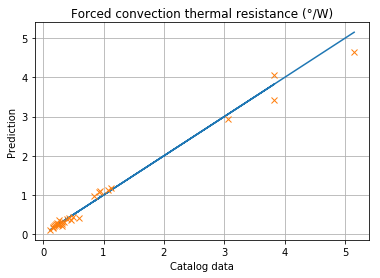

In [12]:
# Y vector prediction
y_HSf=10**(resultHS_f.predict(XHS))

# plot the data 
#plt.plot(dHS['Rthn'].values,dHS['Rthn'].values, '-',dHS['Rthn'].values,y_HS, 'o')
plt.plot(dHS['Rthf'].values,dHS['Rthf'].values, '-')
plt.plot(dHS['Rthf'].values,y_HSf, 'x')
plt.xlabel('Catalog data')
plt.ylabel('Prediction')
plt.title('Forced convection thermal resistance (°/W)')
plt.grid()
plt.show()

In [13]:
1.500e+02*197**(-0.85)*20**(-0.62)

0.26251635741381324